# Steps To train model
## 1. Preprocess + EDA + Feature Selection
## 2. Extract input and output cols
## 3.Scale The Values
## 4.Train test split
## 5.Train the Model
## 6. Evaluate the model
## 7. Deploy the mode

### In this code we will train our model in such way using the data set that it will predict the perticular student will be placed or not

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


Now we will remove the unneccesory column i.e Unnamed: 0 that it is unnecessarily consuming the space

In [ ]:
df = df.drop('Unnamed:0',axis=1) # or df = df.iloc([:,1:])

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


 ### Now we will visualize the data i.e in the form of the graph(scatterplot)

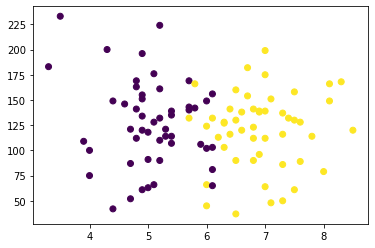

In [11]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

 Now we will seperate the dependent and the independent values

In [22]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

Now we will train and test the Data with the help of the sklearn

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
# above 0.1 means 10 percent data is used for the testing and 90 percent is used for the training the model

Now we can see which data is used for testing and which data is used for training

In [31]:
x_test

,Unnamed: 0,cgpa
95,95,4.3
2,2,5.3
26,26,7.0
99,99,6.2
28,28,5.2
78,78,6.1
83,83,7.5
69,69,8.5
93,93,6.8
87,87,5.7


In [32]:
y_test

95    0
2     0
26    1
99    1
28    0
78    0
83    1
69    1
93    1
87    1
Name: placement, dtype: int64

Now we will scale the values for the better understanding not that necesory but the good practice

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
x_train = scaler.fit_transform(x_train)

In [36]:
x_train

array([[ 0.731087  , -1.73449401],
       [-0.81498223, -0.85004947],
       [ 1.66591957, -1.11538283],
       [ 0.69513191, -0.85004947],
       [ 0.8389523 ,  0.12283952],
       [-0.09588026,  0.03439507],
       [-1.35430871,  0.03439507],
       [-0.23970066, -0.49627166],
       [ 0.55131151,  0.29972843],
       [-1.5700393 , -0.14249384],
       [ 0.51535641,  0.03439507],
       [ 0.8029972 ,  0.29972843],
       [-0.85093733, -1.11538283],
       [ 1.45018897, -1.38071619],
       [-0.27565576, -0.93849392],
       [ 0.22771562,  0.38817288],
       [ 0.01198503,  0.56506179],
       [ 0.08389523, -2.17671628],
       [-1.21048832,  0.12283952],
       [ 0.04794013, -0.49627166],
       [ 0.8749074 ,  1.18417296],
       [-0.74307204,  0.03439507],
       [-0.56329654,  0.9188396 ],
       [-0.99475773,  0.56506179],
       [ 0.26367072,  1.62639523],
       [ 0.9108625 , -0.93849392],
       [-0.05992516, -0.58471611],
       [ 1.19850328, -0.49627166],
       [ 0.9468176 ,

In [37]:
x_test = scaler.transform(x_test) # here we will not use fit_transform again as we have already understood the pattern of the data in the training part

In [38]:
x_test

array([[ 1.70187466, -1.46916065],
       [-1.6419495 , -0.58471611],
       [-0.77902714,  0.9188396 ],
       [ 1.84569506,  0.21128397],
       [-0.70711694, -0.67316056],
       [ 1.09063799,  0.12283952],
       [ 1.27041348,  1.36106187],
       [ 0.7670421 ,  2.24550641],
       [ 1.62996447,  0.74195069],
       [ 1.41423388, -0.2309383 ]])

for training the model we will use logistic regression clasifier and train the model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()

### This is the model training step using the fit

In [42]:
clf.fit(x_train,y_train)# with the help of the fit method we will train the model

LogisticRegression()

### Now we will predict using the trained model

In [48]:
y_predict = clf.predict(x_test)
y_predict

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [46]:
y_test

95    0
2     0
26    1
99    1
28    0
78    0
83    1
69    1
93    1
87    1
Name: placement, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_predict) # This will give the accuracy of our model

0.8

### To see the actual line that is giving the prediction

In [55]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

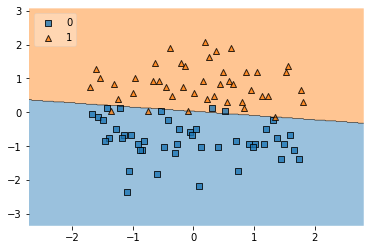

In [57]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

## To make the file of the Trained model we will use python library Pickle

In [58]:
import pickle

In [59]:
pickle.dump(clf,open('placement.pkl','wb'))

Now the trained model will be there in your folder